In [2]:
!ls ..

data  logs  notebooks  requirements.txt  src  train.sh


In [8]:
import os
import sys
import numpy as np

import torch

import matplotlib.pyplot as plt
import seaborn as sbn

from l5kit.data import LocalDataManager, ChunkedDataset
from l5kit.dataset import AgentDataset, EgoDataset
from l5kit.rasterization import build_rasterizer

%matplotlib inline

/home/dmdr/anaconda3/envs/torch/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
os.environ["L5KIT_DATA_FOLDER"] = "../data"

dm = LocalDataManager(None)

In [10]:
cfg = {
    "format_version": 4,
    "model_params": {
        "history_num_frames": 10,
        "history_step_size": 1,
        "history_delta_time": 0.1,
        "future_num_frames": 50,
        "future_step_size": 1,
        "future_delta_time": 0.1,
    },
    "raster_params": {
        "raster_size": [224, 224],
        "pixel_size": [0.5, 0.5],
        "ego_center": [0.25, 0.5],
        "map_type": "py_semantic",
        "satellite_map_key": "aerial_map/aerial_map.png",
        "semantic_map_key": "semantic_map/semantic_map.pb",
        "dataset_meta_key": "meta.json",
        "filter_agents_threshold": 0.5,
    },
    "train_data_loader": {
        "key": "scenes/train.zarr",
        "batch_size": 12,
        "shuffle": True,
        "num_workers": 4,
    },
}

In [12]:
rasterizer = build_rasterizer(cfg, dm)
train_zarr = ChunkedDataset(dm.require("scenes/train.zarr")).open()
train_dataset = AgentDataset(cfg, train_zarr, rasterizer)

In [14]:
sample = train_dataset[0]

print(list(sample.keys()))

['image', 'target_positions', 'target_yaws', 'target_availabilities', 'history_positions', 'history_yaws', 'history_availabilities', 'world_to_image', 'raster_from_world', 'raster_from_agent', 'agent_from_world', 'world_from_agent', 'track_id', 'timestamp', 'centroid', 'yaw', 'extent']


In [25]:
sample["target_availabilities"]

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [26]:
sample["target_positions"]

array([[0.848598  , 0.03586248],
       [1.706174  , 0.08342512],
       [2.555019  , 0.1166783 ],
       [3.4014366 , 0.18800972],
       [4.2502236 , 0.23340139],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.

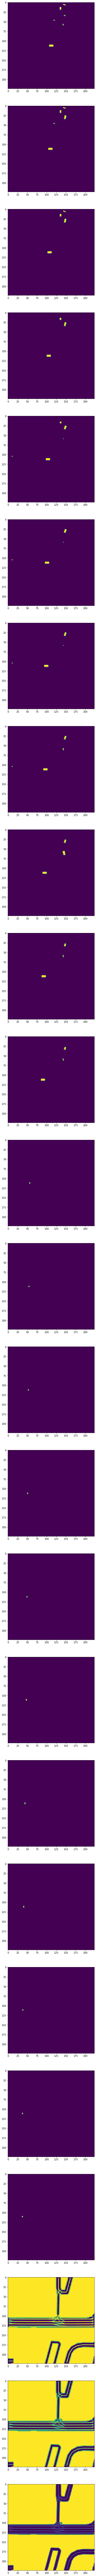

In [24]:
columns = 1
rows = sample["image"].shape[0]

fig = plt.figure(figsize=(10, 200))

for i in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(sample["image"][i - 1])